# Задание 1: Написать свой скрипт, который переводит изображение из формата BGR в RGB (аналог библиотечной функции cv.cvtColor(img_bgr, cv.COLOR_BGR2RGB)). Для проверки используйте изображение starry_night.jpg


In [33]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import random

In [34]:
def COLOR_BGR2RGB(img):
    return img[...,[2,1,0]]

(600, 752, 3)

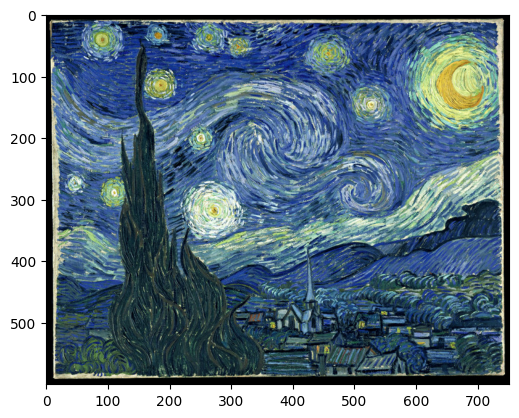

In [35]:
img = cv2.imread("starry_night.jpg")
img = COLOR_BGR2RGB(img)
plt.imshow(img)
img.shape

# Задание 2: Написать скрипт, который меняет местами луну и голубую воронку (в самом центре) на изображении starry_night.jpg.


In [36]:
def swap(img, a, b, h, w):
    image = np.copy(img)
    c1 = img[a[0]:a[0]+h,a[1]:a[1]+w]
    c2 = img[b[0]:b[0]+h,b[1]:b[1]+w]
    image[a[0]:a[0]+h,a[1]:a[1]+w]= c2
    image[b[0]:b[0]+h,b[1]:b[1]+w] = c1
    return image

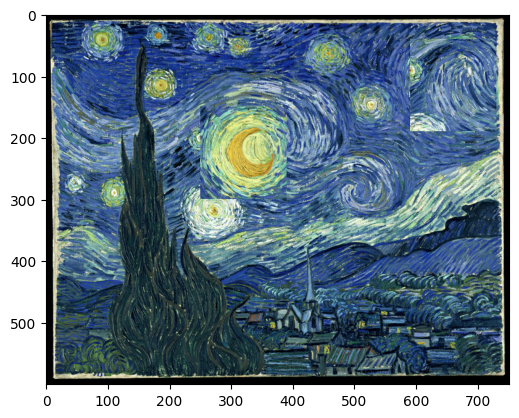

In [37]:
plt.imshow(swap(img,[150, 250],[40, 590],150,140))

# Задание 3: Попробуйте превратить "starry_night" в "starry_day" путем увеличения яркости изображения и смены темно-синих тонов на светло-желтые. Как это сделать? См. подсказку по смешиванию RGB цветов в файле color_blending.gif. Замечание: при проведении экспериментов с матрицами каналов, обратите внимание на dtype этих матриц (стандартный тип uint8 не позволит вам выйти за границы диапазона 0 .. 255, и поэтому может быть причиной появления не тех результатов, которые вы ожидаете, поэтому перед проведением операций целесообразно этот тип сменить на более подходящий).

##  смена темно-синих тонов на светло-желтые.

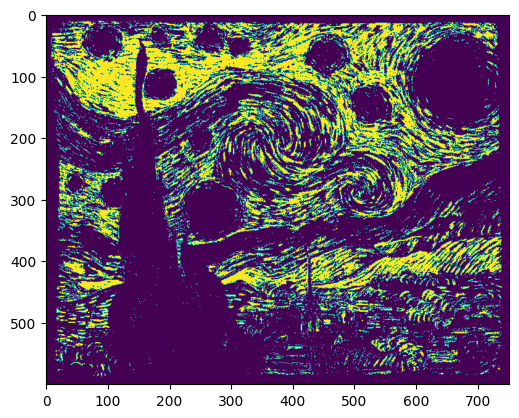

In [38]:
# поиск темно-синих тонов
mi = 100
ma = 100
Navy_blue_1 = img[:, :, 2] > ma
Navy_blue_2 = img[:, :, 0] < mi
Navy_blue_3 = img[:, :, 1] < mi

Navy_blue = Navy_blue_1 * Navy_blue_2 * Navy_blue_3
plt.imshow(Navy_blue)

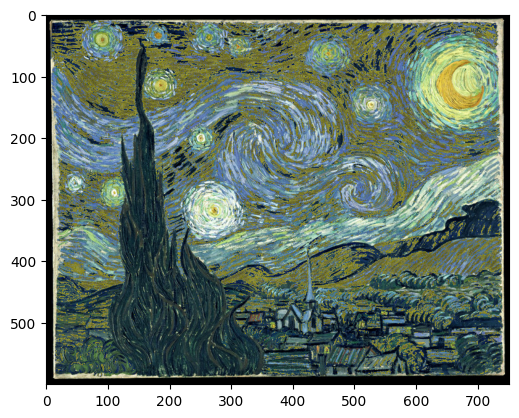

In [39]:
# их замена
starry_day = np.copy(img)
for y in range(img.shape[0]):
    for x in range(img.shape[1]):
        if Navy_blue[y,x]:
            starry_day[y,x,0] = 255 - img[y,x,2]
            starry_day[y,x,1] = 255 - img[y,x,2]
            starry_day[y,x,2] = random.randint(0,100)
plt.imshow(starry_day)


## Усветление картинки

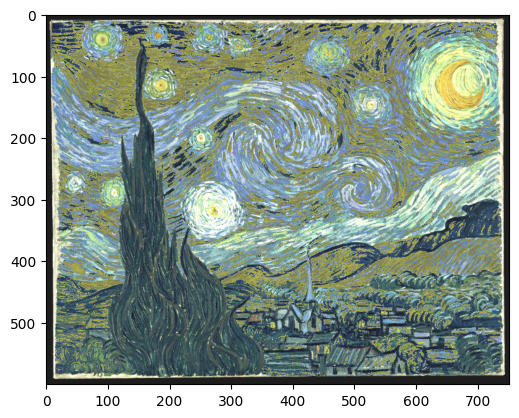

In [40]:
alf = 30
for y in range(img.shape[0]):
    for x in range(img.shape[1]):
        starry_day[y,x,0] = min(255, starry_day[y,x,0] + alf)
        starry_day[y,x,1] = min(255, starry_day[y,x,1] + alf)
        starry_day[y,x,2] = min(255, starry_day[y,x,2] + alf)
plt.imshow(starry_day)